# **UAS PSD**

NPM     : 200411100195

Nama    : Muhammad Arbiansyafa Siswanto (Ketua)

NPM     : 200411100118

Nama    : Bachtiar Dwi Yusril R. (Anggota)

GitHub  : https://github.com/Arbiansa/kolaborasipro

# Get and prepare Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas as pd

# URL file CSV di repositori GitHub
csv_url = 'https://raw.githubusercontent.com/Arbiansa/kolaborasipro/main/PLN%3DX.csv'

# Membaca file CSV dari URL menggunakan pandas
df_data = pd.read_csv(csv_url)

# Menampilkan data dari file CSV
df_data.head(7)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-14,4.46600,4.47688,4.42988,4.46600,4.46600,0
1,2022-06-15,4.46002,4.50125,4.44080,4.46002,4.46002,0
2,2022-06-16,4.45990,4.54237,4.45280,4.45990,4.45990,0
3,2022-06-17,4.47920,4.49009,4.45391,4.47920,4.47920,0
4,2022-06-20,4.45950,4.46150,4.40960,4.45950,4.45950,0
5,2022-06-21,4.41570,4.41745,4.38500,4.41570,4.41570,0
6,2022-06-22,4.40151,4.46615,4.40040,4.40151,4.40151,0


In [3]:
df_data.shape

(262, 7)

In [4]:
df_close= df_data['Close']

In [5]:
# transform univariate time series to supervised learning problem
from numpy import array
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + n_steps
    # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
    # gather input and output parts of the pattern
        # print(i, end_ix)
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# Tuning data

In [6]:
n_steps = 5
X, y = split_sequence(df_close, n_steps)

In [7]:
print(X.shape, y.shape)

(257, 5) (257,)


In [8]:
n_steps = 5
X, y = split_sequence(df_close, n_steps)  # column names to X and y data frames
df_X = pd.DataFrame(X, columns=['t-' + str(i) for i in range(n_steps-1, -1, -1)])
df_y = pd.DataFrame(y, columns=['t+1 (prediction)'])

# concat df_X and df_y
df = pd.concat([df_X, df_y], axis=1)

In [9]:
print(X.shape, y.shape)

(257, 5) (257,)


In [10]:
df.head(5)

,t-4,t-3,t-2,t-1,t-0,t+1 (prediction)
0,4.46600,4.46002,4.45990,4.47920,4.45950,4.41570
1,4.46002,4.45990,4.47920,4.45950,4.41570,4.40151
2,4.45990,4.47920,4.45950,4.41570,4.40151,4.44450
3,4.47920,4.45950,4.41570,4.40151,4.44450,4.46630
4,4.45950,4.41570,4.40151,4.44450,4.46630,4.43310


# Plotting

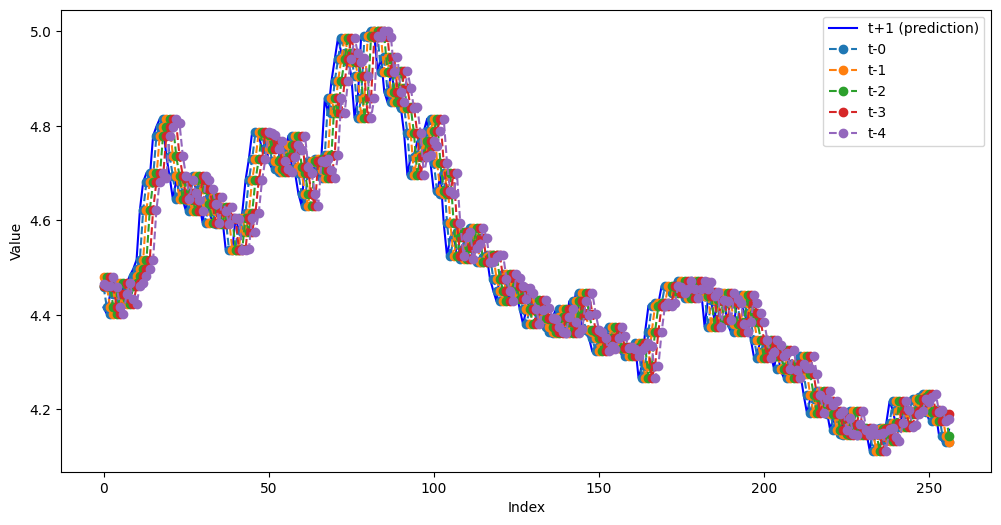

In [11]:
import matplotlib.pyplot as plt

# Membuat subplot dengan lebar sumbu x yang lebih besar
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting
ax.plot(df.index, df['t+1 (prediction)'], label='t+1 (prediction)', linestyle='-', color='blue')
for i in range(n_steps):
    ax.plot(df.index, df['t-' + str(i)], label='t-' + str(i), linestyle='--', marker='o')

ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.legend()
plt.show()

# Preprocessing

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_norm= scaler.fit_transform(df_X)
# y_norm= scaler.fit_transform(df_y)

In [13]:
X_norm

array([[0.39787017, 0.39114485, 0.39100989, 0.41271535, 0.39056003],
       [0.39114485, 0.39100989, 0.41271535, 0.39056003, 0.341301  ],
       [0.39100989, 0.41271535, 0.39056003, 0.341301  , 0.32534242],
       ...,
       [0.09754301, 0.07127602, 0.07588703, 0.08781941, 0.03593998],
       [0.07127602, 0.07588703, 0.08781941, 0.03593998, 0.02194951],
       [0.07588703, 0.08781941, 0.03593998, 0.02194951, 0.02173358]])

## Split data

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=0)

## Model KNN

In [15]:
# import knn
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=7)

## Fit dan Prediksi KNN

In [16]:
model_knn.fit(X_train, y_train)
y_pred=model_knn.predict(X_test)

## MSE

$$ \text{MSE} = \frac{1}{n} \sum_{i=0}^n (y_i - \hat{y}_i)^2$$

In [17]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.001642977628699374

## Hasil Mape

In [18]:
from sklearn.metrics import mean_absolute_percentage_error

# Assuming you have the true target values (y_test) and the predicted values (y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", mape)

Mean Absolute Percentage Error: 0.006805572880244369


## Result

In [19]:
y_test.shape

(52,)

In [20]:
y_pred.shape

(52,)

In [21]:
df_y_test = pd.DataFrame(y_test,columns=['y_test'])
df_y_pred = pd.DataFrame(y_pred,columns=['y_pred'])

df_hasil = pd.concat([df_y_test, df_y_pred], axis=1)

In [22]:
df_hasil

,y_test,y_pred
0,4.324700,4.331631
1,4.914600,4.903389
2,4.459319,4.446496
3,4.654700,4.682416
4,4.328101,4.335345
5,4.336100,4.340589
6,4.451180,4.516330
7,4.132517,4.158918
8,4.730777,4.717798
9,4.361909,4.381609


In [23]:
# df_hasil.to_excel('df_hasil n_step={}.xlsx'.format(n_steps), index=False)

In [24]:
y.min()

4.112223

In [25]:
y.max()

5.0014

## Model Naive Bayes

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


# Create a Naive Bayes
naive_bayes = GaussianNB()

## Fit & Predict Naive Bayes

In [27]:
import numpy as np

# Define the bin edges or thresholds
bin_edges = [4.0, 4.5, 5.0]  # Adjust the values based on your requirements

# Perform binning on the labels
y_train_categorical = np.digitize(y_train, bin_edges)

# Create a Naive Bayes classifier
naive_bayes = GaussianNB()

# Training the model
naive_bayes.fit(X_train, y_train_categorical)

# Making predictions on the test set
y_pred = naive_bayes.predict(X_test)

## Plotting the predicted values and actual values

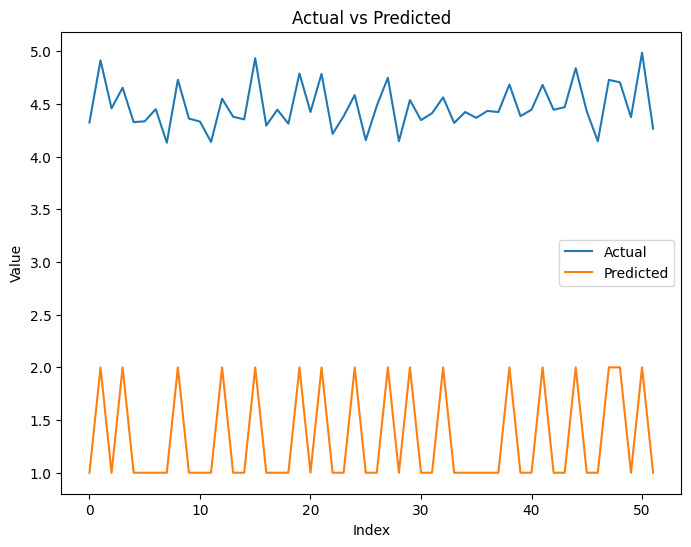

In [28]:
# Plotting the predicted values and actual values
plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual')
plt.plot(np.arange(len(y_test)), y_pred, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

## MSE

In [29]:
# Calculating MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 9.993711507303097


## Mape

In [30]:
# Calculating MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 0.7067874081295376


## Model Random Forest Model

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Create a Random Forest Regressor
random_forest = RandomForestRegressor()

In [32]:
# Train the model
random_forest.fit(X_train, y_train)

# Make predictions
predictions = random_forest.predict(X_test)

In [33]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.0012377826377950767


In [34]:
mape = mean_absolute_percentage_error(y_test, predictions)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 0.006070738042576177
